<a href="https://colab.research.google.com/github/Saul-Ochoa/Python-MachineLearning/blob/main/Machine%20learning%20projects/Prices_Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Price Prediction**

In [194]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [195]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/Machine%20learning%20projects/Data/diamonds.csv'
df=pd.read_csv(url,sep=',')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [196]:
df.shape

(50000, 10)

In [197]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [198]:
print("Number of duplicate data : ",df.duplicated().sum())

Number of duplicate data :  126


In [199]:
df = df.drop_duplicates()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [200]:
df.shape

(49874, 10)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49874 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49874 non-null  float64
 1   cut      49874 non-null  object 
 2   color    49874 non-null  object 
 3   clarity  49874 non-null  object 
 4   depth    49874 non-null  float64
 5   table    49874 non-null  float64
 6   price    49874 non-null  int64  
 7   x        49874 non-null  float64
 8   y        49874 non-null  float64
 9   z        49874 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.2+ MB


In [202]:
df.describe()

,carat,depth,table,price,x,y,z
count,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000
mean,0.799331,61.751803,57.458786,3945.384569,5.734441,5.738060,3.541028
std,0.474607,1.428207,2.231087,3996.939331,1.122340,1.144973,0.706607
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,952.000000,4.720000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2414.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5352.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [203]:
df.select_dtypes(include='object').nunique()

cut        5
color      7
clarity    8
dtype: int64

In [204]:
df.describe(include='object')

,cut,color,clarity
count,49874,49874,49874
unique,5,7,8
top,Ideal,G,SI1
freq,19881,10424,12086


In [205]:
cordenadas=['x','y','z']
for x in cordenadas:
  print(f"Tabla con la columna {x} menor igual cero")
  print(df[df[x]<=0])
  print('')

Tabla con la columna x menor igual cero
       carat        cut color clarity  depth  table  price    x     y    z
10310   1.07      Ideal     F     SI2   61.6   56.0   4954  0.0  6.62  0.0
11038   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.00  0.0
14731   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.00  0.0
22721   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.00  0.0
24336   1.20    Premium     D    VVS1   62.1   59.0  15686  0.0  0.00  0.0
25439   2.25    Premium     H     SI2   62.8   59.0  18034  0.0  0.00  0.0
45910   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0

Tabla con la columna y menor igual cero
       carat        cut color clarity  depth  table  price    x    y    z
11038   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.0  0.0
14731   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.0  0.0
22721   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.0  0.0
24336   1.20    Premium

In [206]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [207]:
#las dimensiones de x,y,z no pueden ser mayor a cero
df=df.loc[(df['x']>0) & (df['y']>0) & (df['z']>0)]
df.shape

(49857, 10)

## Variables Categoricas

In [208]:
cat_vals=df.select_dtypes(include='object').columns
cat_vals

Index(['cut', 'color', 'clarity'], dtype='object')

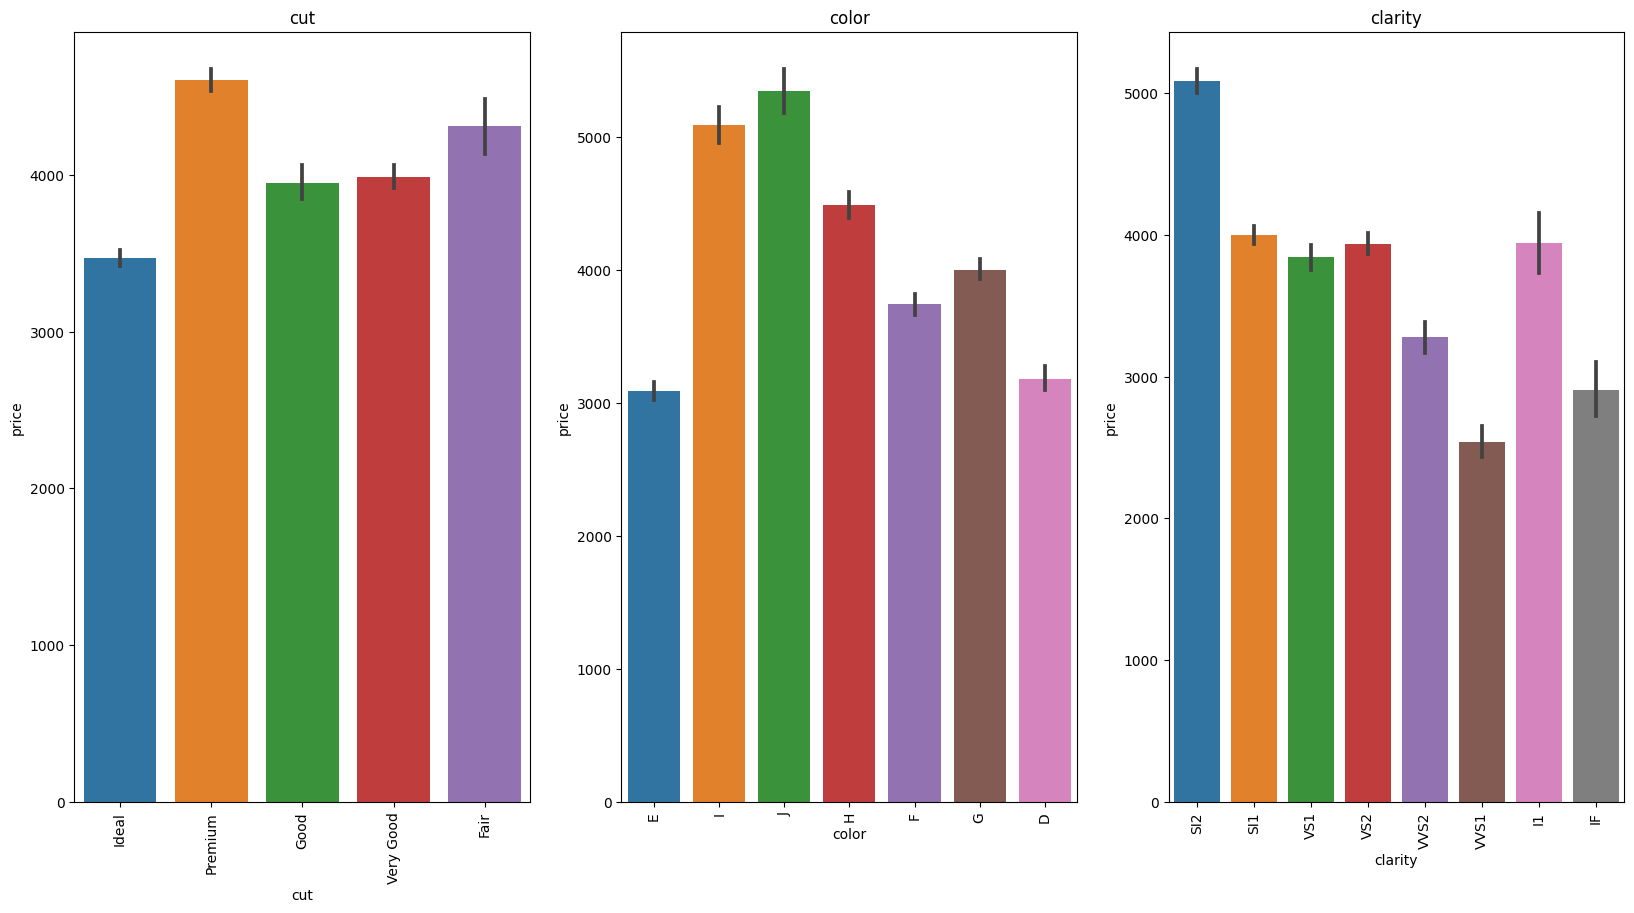

In [209]:
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,10))
axs=axs.flatten()
for i,x in enumerate(cat_vals):
  sns.barplot(x=x,y='price',data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
  axs[i].set_title(x)
fig.tight_layout
plt.show()

In [210]:
px.histogram(df.sample(n=10000, replace=False, random_state=123).sort_index(), x='cut',
             facet_col='color', color='cut', title='Cut Counts By Each Color',
             color_discrete_sequence=px.colors.qualitative.Pastel)

In [211]:
px.histogram(df.sample(n=10000, replace=False, random_state=123).sort_index(), x='clarity',
             facet_col='color', color='clarity', title='Clarity By Each Color',
             color_discrete_sequence=px.colors.qualitative.Pastel)

## **Variables Numericas**

In [212]:
df.select_dtypes(include='number').columns
num_vals=['carat', 'depth', 'table', 'x', 'y', 'z']

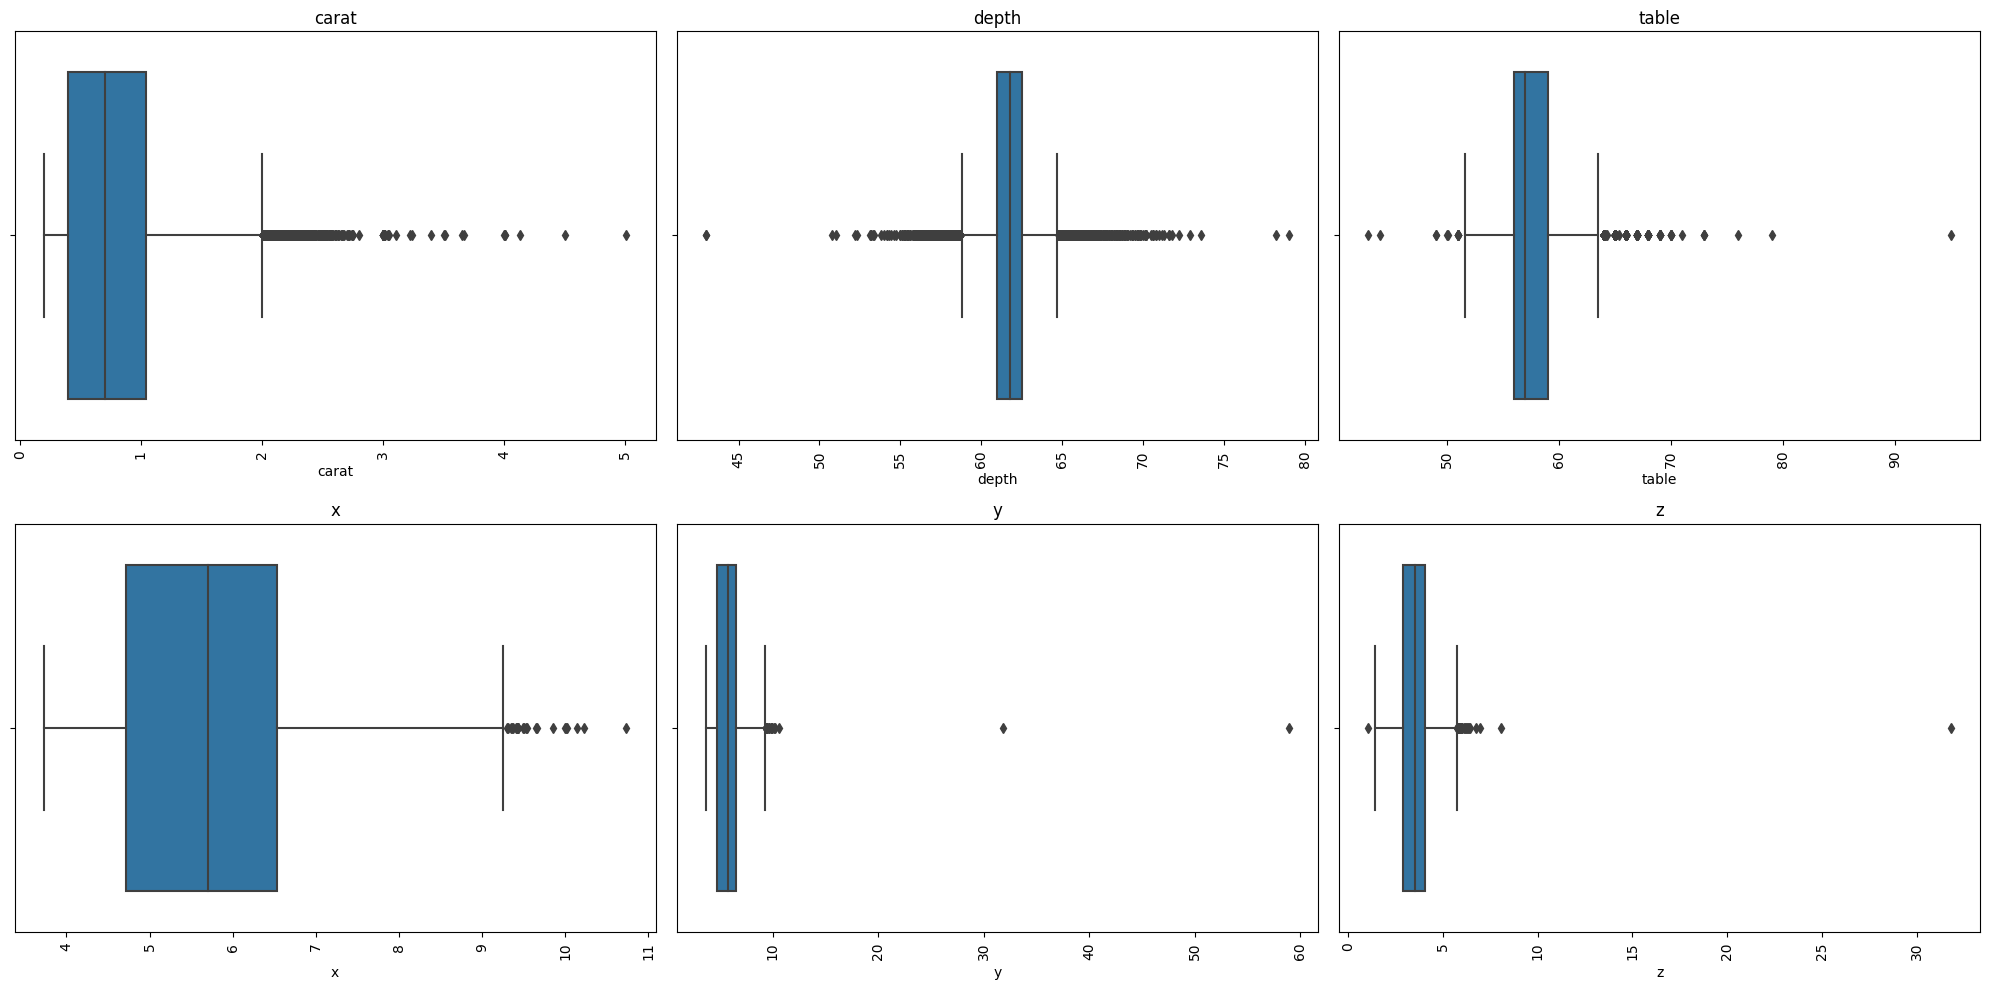

In [213]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vals):
    sns.boxplot(x=var, data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_title(var)

fig.tight_layout()
plt.show()


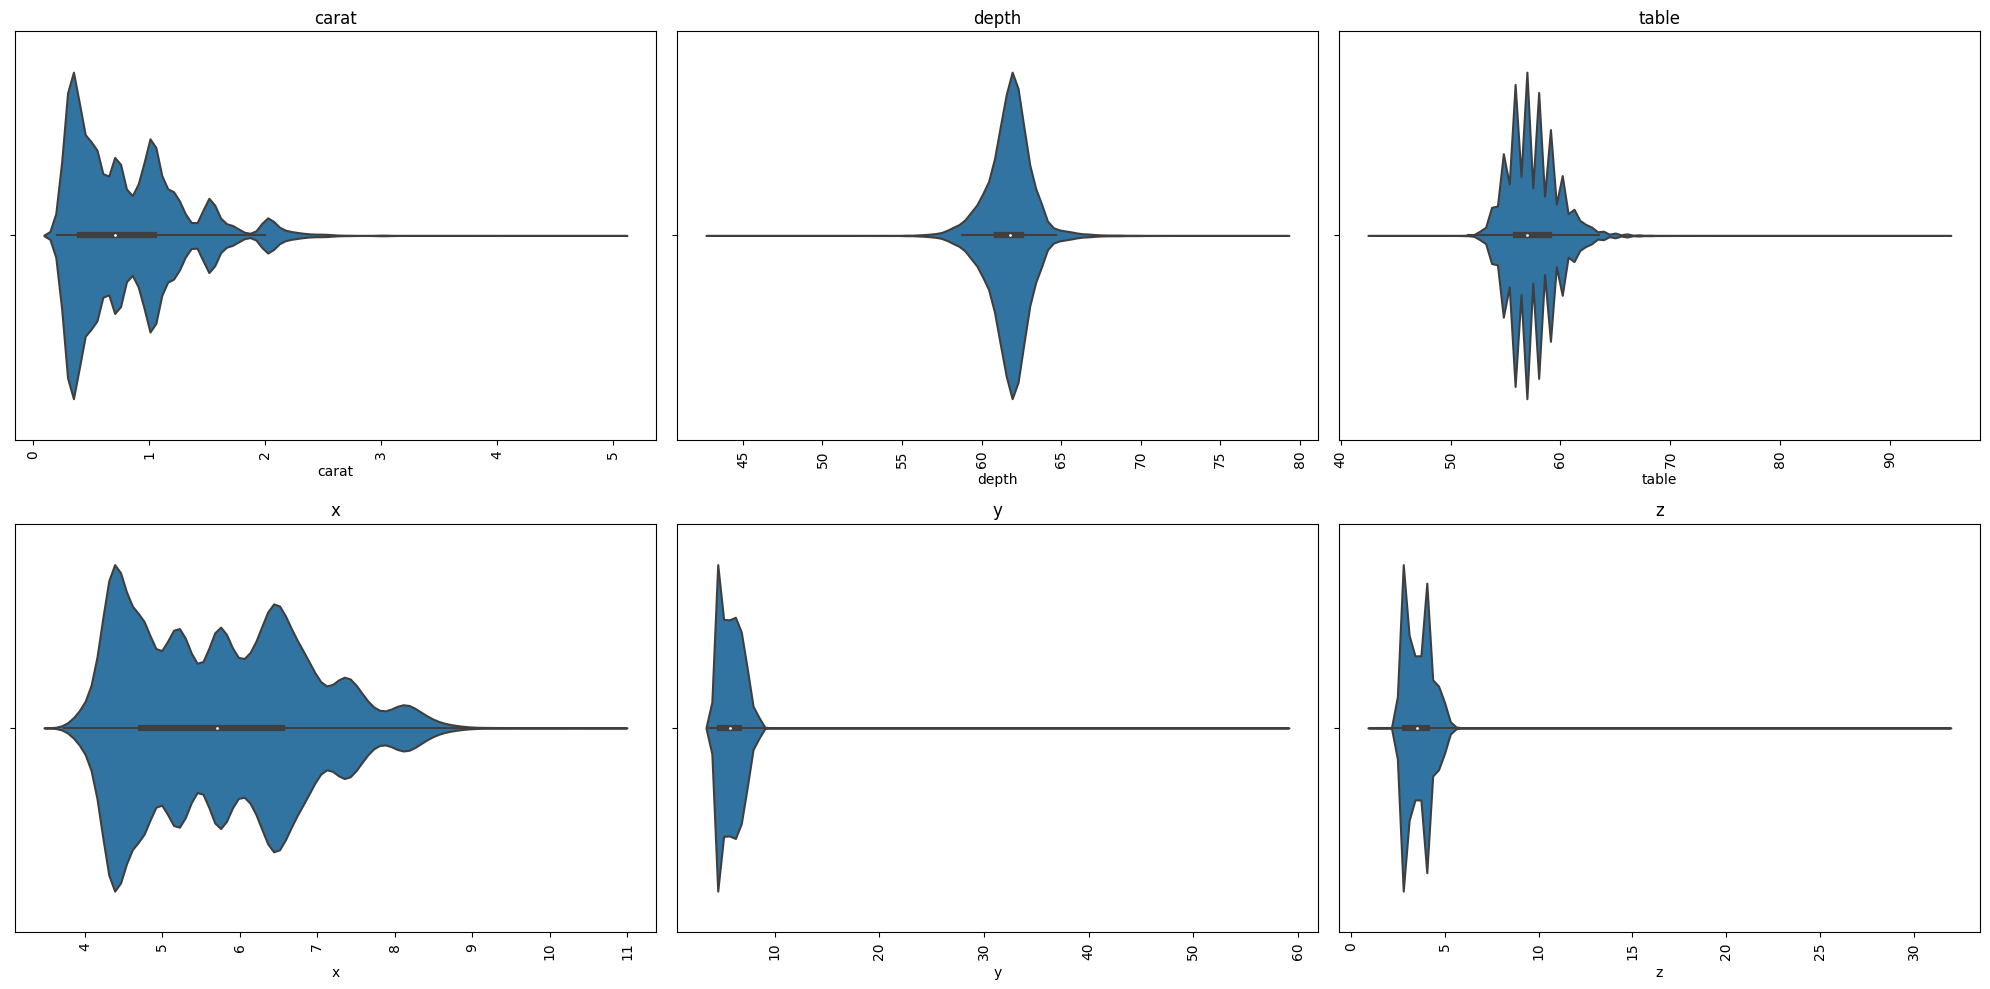

In [214]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vals):
    sns.violinplot(x=var, data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_title(var)

fig.tight_layout()
plt.show()


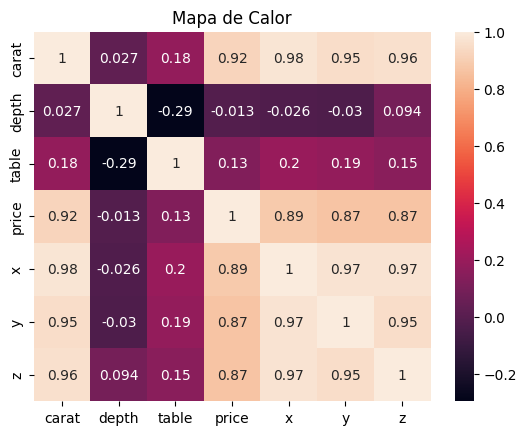

In [215]:
sns.heatmap(df.corr(),annot=True)
plt.title('Mapa de Calor')
plt.show()

In [216]:
num_vals=df.select_dtypes(include='number').columns
num_vals

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [217]:
fig=px.scatter_matrix(df,dimensions=num_vals)
fig.update_layout(title='Pairplot', title_font=dict(size=25))
fig.show()

In [218]:
#las variables x,y,z tienen alta correlacion con las demas variables
#se recomienda eliminar las variables
df['xyz']=df['x']*df['y']*df['z']
df.drop(columns=['x','y','z'],axis=1,inplace=True)

In [219]:
df.head()

,carat,cut,color,clarity,depth,table,price,xyz
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


## **Label Encoding**

In [220]:
df.select_dtypes(include=['object']).columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [221]:
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
  label_encoder=preprocessing.LabelEncoder()
  label_encoder.fit(df[col].unique())
  df[col]=label_encoder.transform(df[col])
  print(f"{col}: {df[col].unique()}")

cut: [2 3 1 4 0]
color: [1 5 6 4 2 3 0]
clarity: [3 2 4 5 7 6 0 1]


In [222]:
df.head()

,carat,cut,color,clarity,depth,table,price,xyz
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


## **Modeling**

**Linear Regression Model**

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [224]:
X=df.drop('price',axis=1)
y=df['price']

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)
model = LinearRegression(fit_intercept=True)
# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo utilizando la métrica de error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse.round(4))
# Cálculo de la Raíz del Error Cuadrático Medio (RMSE)
rmse=np.sqrt(mse)
print("RMSE:", rmse)
# Cálculo del coeficiente de determinación (R^2)
r2=r2_score(y_test, y_pred)
print("R^2:", r2)

Error cuadrático medio (MSE): 1814247.2733
RMSE: 1346.9399664692614
R^2: 0.8848026847475475


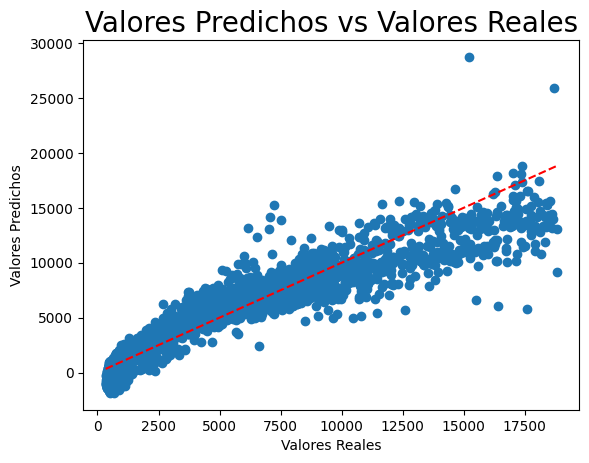

In [226]:
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs Valores Reales',fontsize=20)
plt.show()

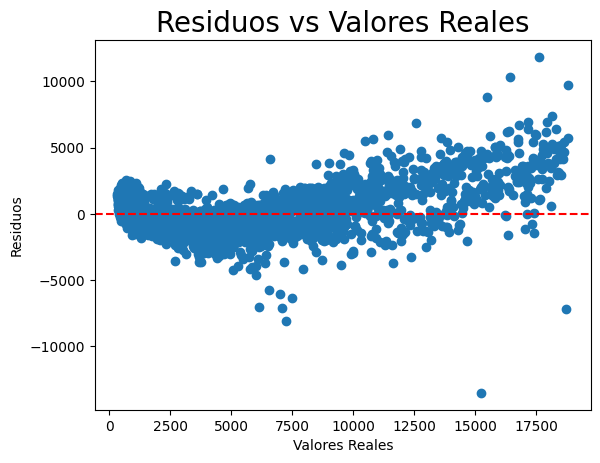

In [227]:
#Graficos de los residuoos
residuos=y_test-y_pred
plt.scatter(y_test,residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Reales',fontsize=20)
plt.show()

**KNearest Neighbors Regression**

In [229]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn=KNeighborsRegressor()
#Definir los hiperparametros
param_grid = {
    'n_neighbors': range(3,11,2),
    'weights': ['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

grid_search=GridSearchCV(knn,param_grid,cv=5,scoring='r2')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'algorithm': 'brute', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [231]:
kne=KNeighborsRegressor(algorithm='brute',n_neighbors=9,p=1,weights='distance')
kne.fit(X_train,y_train)

KNeighborsRegressor(algorithm='brute', n_neighbors=9, p=1, weights='distance')

In [240]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred=kne.predict(X_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print('MAE es {}'.format(mae))
print('MAPE es {}'.format(mape))
print('MSE es {}'.format(mse))
print('r2 es {}'.format(r2))
print('RMSE scored es {}'.format(rmse))

MAE es 396.10872149768323
MAPE es 0.11617591168914976
MSE es 656654.7833172117
r2 es 0.9583050947904201
RMSE scored es 810.3423864745147


**Conclusion el mejor modelo segun el r2 es el KNearest Neighbors Regression.**